In [3]:
pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [6]:
NUM_CLASSES = 33 # Number of the classes used in the training (a-z,I Love You,Thank You,Help,Play,Stop,Hello,Good Morning)

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 33)                363       
                                                                 
Total params: 1433 (5.60 KB)
Trainable params: 1433 (5.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping if there is no scope for the improvement in the accuracy
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation using the ADAM optimizer
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/85 [..............................] - ETA: 15s - loss: 3.4980 - accuracy: 0.0156
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 2ms/step - loss: 3.4197 - accuracy: 0.0467 - val_loss: 3.2970 - val_accuracy: 0.0307
Epoch 2/1000
 1/85 [..............................] - ETA: 0s - loss: 3.3118 - accuracy: 0.0781
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 823us/step - loss: 3.2100 - accuracy: 0.0818 - val_loss: 3.0139 - val_accuracy: 0.1312
Epoch 3/1000
 1/85 [..............................] - ETA: 0s - loss: 3.0885 - accuracy: 0.1328
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 826us/step - loss: 2.9723 - accuracy: 0.1372 - val_loss: 2.7635 - val_accuracy: 0.2344
Epoch 4/1000
 1/85 [..............................] - ETA: 0s - loss: 2.8834 - accuracy: 0.1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 824us/step - loss: 2.7864 - accuracy: 0.1724 - val_loss: 2.5477 - val_accuracy: 0.3211
Epoch 5/1000
 1/85 [..............................] - ETA: 0s - loss: 2.7503 - accuracy: 0.1484
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 822us/step - loss: 2.6446 - accuracy: 0.2079 - val_loss: 2.3789 - val_accuracy: 0.3800
Epoch 6/1000
 1/85 [..............................] - ETA: 0s - loss: 2.5054 - accuracy: 0.2109
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [==============================] - 0s 805us/step - loss: 2.5267 - accuracy: 0.2314 - val_loss: 2.2489 - val_accuracy: 0.3997
Epoch 7/1000
 1/85 [..............................] - ETA: 0s - loss: 2.6129 - accuracy: 0.2109
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
85/85 [=======

In [15]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

29/29 [==============================] - 0s 378us/step - loss: 0.9042 - accuracy: 0.7611


In [16]:
#  Cell used for loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 39ms/step
[1.04299588e-05 1.12872673e-02 5.68805146e-04 1.43569394e-03
 1.60864554e-03 8.30886606e-03 1.12682785e-04 2.01898813e-02
 4.94455220e-04 5.56404586e-04 1.66392773e-01 8.71978234e-03
 9.65337385e-05 2.49478593e-03 4.17500676e-04 1.76618565e-02
 2.55294237e-03 9.95017868e-03 2.23446230e-04 1.22012039e-04
 3.21221590e-01 2.42098764e-01 1.45624980e-01 8.31870548e-03
 6.71051210e-04 3.16682243e-04 1.42096495e-03 1.48137077e-03
 4.70317376e-04 6.93600377e-05 1.61577051e-03 1.12087736e-02
 1.22767212e-02]
20


# Confusion matrix

113/113 [==============================] - 0s 592us/step


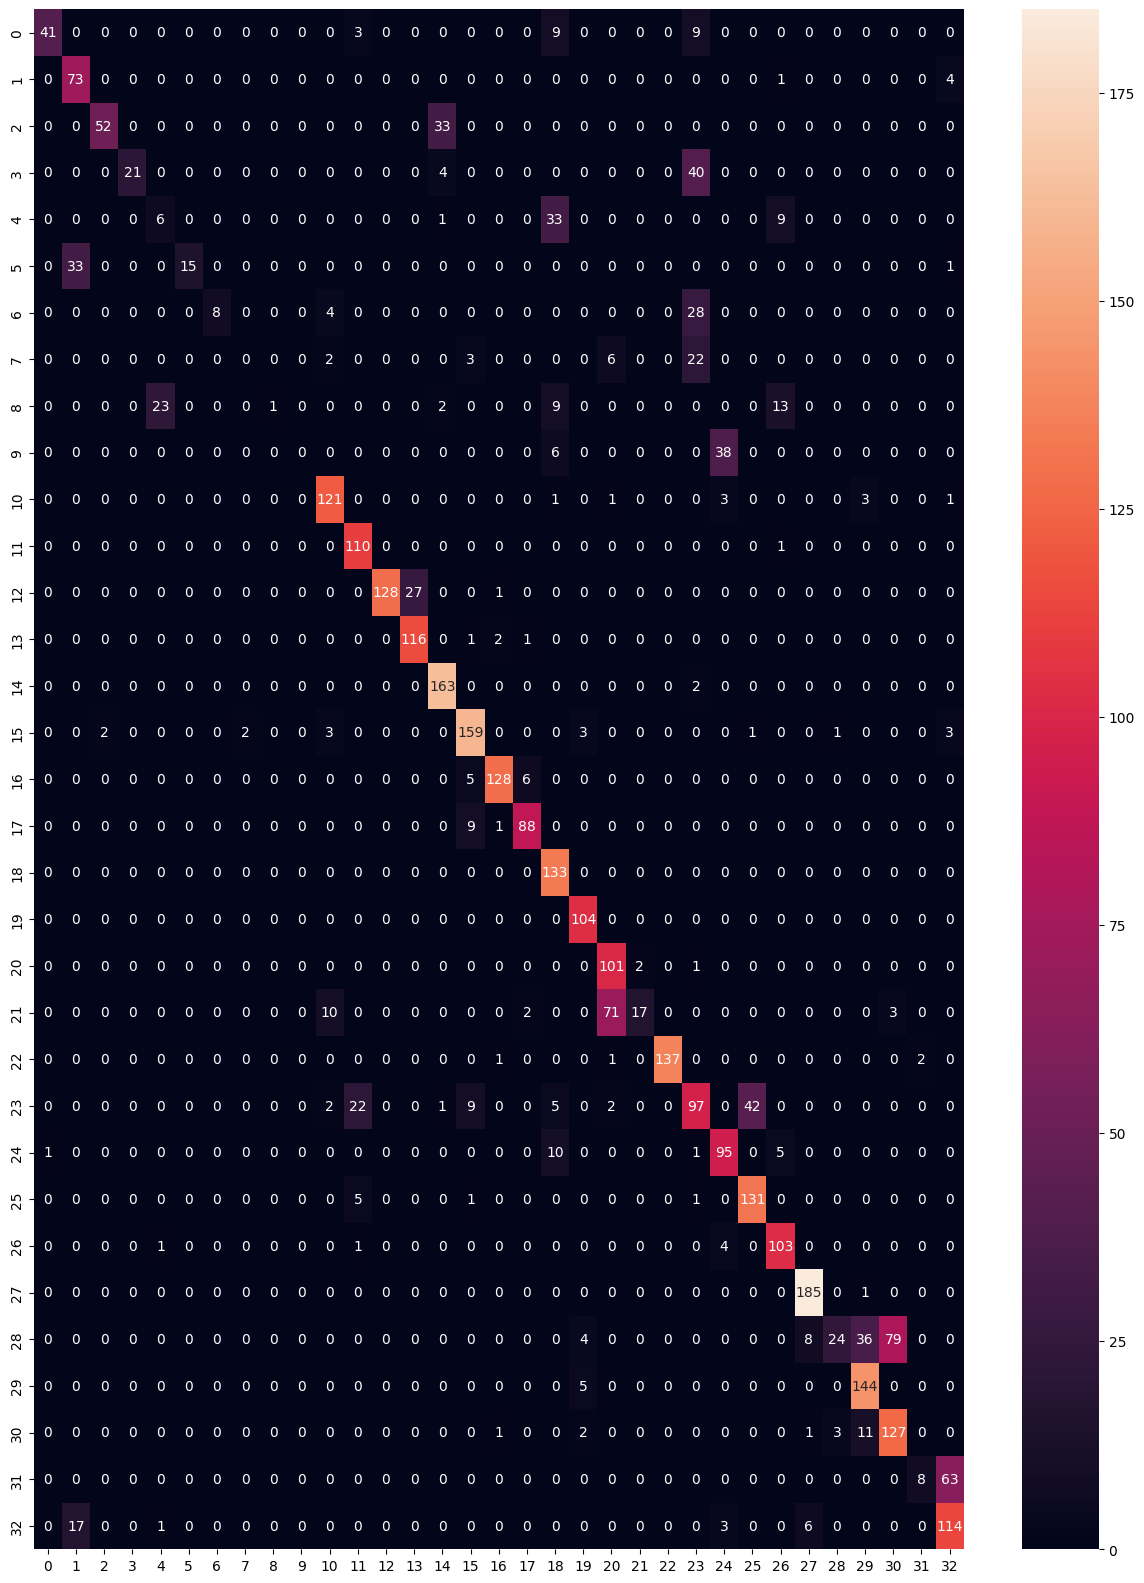

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.66      0.79        62
           1       0.59      0.94      0.73        78
           2       0.96      0.61      0.75        85
           3       1.00      0.32      0.49        65
           4       0.19      0.12      0.15        49
           5       1.00      0.31      0.47        49
           6       1.00      0.20      0.33        40
           7       0.00      0.00      0.00        33
           8       1.00      0.02      0.04        48
           9       0.00      0.00      0.00        44
          10       0.85      0.93      0.89       130
          11       0.78      0.99      0.87       111
          12       1.00      0.82      0.90       156
          13       0.81      0.97      0.88       120
          14       0.80      0.99      0.88       165
          15       0.85      0.91      0.88       174
          16       0.96      0.92      0.94       139
     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(15, 20))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [20]:
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/wb/k4jb1pf916zfx4_4y75g4ml40000gn/T/tmph555l8jw/assets


INFO:tensorflow:Assets written to: /var/folders/wb/k4jb1pf916zfx4_4y75g4ml40000gn/T/tmph555l8jw/assets
2024-04-15 02:33:32.600422: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-15 02:33:32.600446: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


7820

# Inference test

In [22]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [23]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [24]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [25]:
%%time
# Implementation of the inference 
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 230 µs, sys: 215 µs, total: 445 µs
Wall time: 304 µs


In [26]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0429949e-05 1.1287268e-02 5.6880509e-04 1.4356937e-03 1.6086455e-03
 8.3088661e-03 1.1268277e-04 2.0189876e-02 4.9445516e-04 5.5640453e-04
 1.6639276e-01 8.7197805e-03 9.6533731e-05 2.4947857e-03 4.1750065e-04
 1.7661855e-02 2.5529424e-03 9.9501777e-03 2.2344620e-04 1.2201203e-04
 3.2122156e-01 2.4209876e-01 1.4562501e-01 8.3187055e-03 6.7105086e-04
 3.1668192e-04 1.4209641e-03 1.4813701e-03 4.7031688e-04 6.9359965e-05
 1.6157704e-03 1.1208773e-02 1.2276722e-02]
20
